# Predict house pricing using advanced regression

Predict the price of a house based on the dataset from Kaggle


Data Preparation
Missing values
Categorical variables
Numeric variables
Ranking variables
Feature engineering
Correlation
Selecting the best variable

Modeling
Combine data (train and test)
Clean and fill in missing values
Separate train and test dataset
Split the training dataset into train and test
Train model and test
Use Gradient Boosting and Random forest regressors
Mean absolute error or mean square error
Predict on actual Kaggle test dataset

In [1]:
import pandas as pd #Data dosyalarunu okuma paketi
pd.set_option("display.max_columns",55)
import seaborn as sns
from scipy.stats import ttest_ind
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

In [2]:
import pandas as pd # Data dosyalarini okuma paketi

pd.set_option("display.max_columns",55)



from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error



import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [3]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('/content/train (1).csv')

In [4]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,...,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,...,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,...,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,...,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,...,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,...,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,...,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,...,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,...,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,...,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,...,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df= pd.merge(df1, df2, how='outer')

# EDA

In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,...,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,...,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,...,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,...,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
2915,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,...,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
2916,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,...,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2917,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,...,5,Typ,0,NaN,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
df.shape

(2919, 81)

In [12]:

empty=df.isnull().sum()
empty[empty>0]

,0
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,1766
MasVnrArea,23
BsmtQual,81
BsmtCond,82


In [13]:
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType']

# Sütunları silme
df = df.drop(columns=columns_to_drop)

In [14]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,...,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,...,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,...,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,...,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,...,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,...,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
2915,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,...,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
2916,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,...,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
2917,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,...,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [15]:
empty=df.isnull().sum()
empty[empty>0]

,0
MSZoning,4
LotFrontage,486
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrArea,23
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79


In [16]:
df['LotFrontage']

,LotFrontage
0,80.0
1,81.0
2,74.0
3,78.0
4,43.0
5,75.0
6,NaN
7,63.0
8,85.0
9,70.0


In [17]:
df['LotFrontage'].mode(),df['LotFrontage'].median(),df['LotFrontage'].mean()

(0    60.0
 Name: LotFrontage, dtype: float64,
 68.0,
 69.30579531442663)

In [18]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [19]:
df['MasVnrArea']

,MasVnrArea
0,0.0
1,108.0
2,0.0
3,20.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [20]:
df['MasVnrArea']= df['MasVnrArea'].fillna('0')

In [21]:
df['MasVnrArea'].isnull().sum()

0

In [22]:
df['BsmtQual']

,BsmtQual
0,TA
1,TA
2,Gd
3,TA
4,Gd
5,Gd
6,Gd
7,Gd
8,Gd
9,TA


In [23]:
df['BsmtQual'].value_counts()

,count
BsmtQual,
TA,1283
Gd,1209
Ex,258
Fa,88


In [24]:
df['BsmtQual'].mode()

,BsmtQual
0,TA


In [25]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode())

In [26]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode())

In [27]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode())
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode())



In [28]:
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode())


In [29]:
df['GarageYrBlt']

,GarageYrBlt
0,1961.0
1,1958.0
2,1997.0
3,1998.0
4,1992.0
5,1993.0
6,1992.0
7,1998.0
8,1990.0
9,1970.0


In [30]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [31]:
df['GarageFinish'].value_counts()

,count
GarageFinish,
Unf,1230
RFn,811
Fin,719


In [32]:
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')

In [33]:
empty=df.isnull().sum()
empty[empty>0]

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79
BsmtFinSF1,1
BsmtFinType2,80


In [48]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode())
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode())


In [81]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'] .fillna(df['BsmtExposure'] .mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['SaleType'] =df['SaleType'].fillna(df['SaleType'].mode()[0])
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mode()[0])
df['GarageCars'] =df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['BsmtHalfBath'] =df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['BsmtFullBath'] = df['BsmtFullBath'].fillna( df['BsmtFullBath'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0])
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st'] =df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] =df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])


In [52]:
empty=df.isnull().sum()
empty[empty>0]

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79
BsmtFinType2,80
Electrical,1


In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [84]:
empty=df.isnull().sum()
empty[empty>0]

,0
SalePrice,1459


In [77]:

df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mode()[0])
df['TotalBsmtSF'] =df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['GarageCars'] =df['GarageCars'].fillna(df['GarageCars'].mean())
df['GarageArea'] =df['GarageArea'].fillna(df['GarageArea'].mean())

In [45]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['GarageArea'] =df['GarageArea'].fillna(df['GarageArea'].mean())

In [82]:
empty=df.isnull().sum()
empty[empty>0]

,0
SalePrice,1459


In [55]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,2
LotConfig,0


In [60]:
df['GarageCond'] =df['GarageCond'].fillna('TA')

In [64]:
df['GarageQual']=df['GarageQual'].fillna('TA')

In [67]:
df['GarageType']=df['GarageType'].fillna('Attchd')

In [69]:
df['MSZoning'].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


In [70]:
df['MSZoning']=df['MSZoning'].fillna('RL')

In [83]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


## MODELLEME

In [86]:
x=df[1459:].drop("SalePrice",axis=1)
y=df[1459:][['SalePrice']]

In [87]:
x=pd.get_dummies(x,drop_first=True)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()


In [100]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
tahmin=RFR.predict(x_test)

In [102]:
r2_score(y_test,tahmin)

0.8888328158890204

In [103]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [104]:
tahmin=GBR.predict(x_test)

In [105]:
r2_score(y_test,tahmin)

0.8892332355272061

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [95]:
def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()


        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [96]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.944712e-01,2.845066e+04,1.769865e+04
XGBRegressor,8.886437e-01,2.922565e+04,1.784370e+04
Ridge,8.819176e-01,3.009535e+04,1.905753e+04
Lasso,8.752849e-01,3.092904e+04,1.913944e+04
ElasticNet,8.271926e-01,3.640727e+04,2.105637e+04
Extra Tree,7.972270e-01,3.943774e+04,2.531090e+04
Decision Tree,7.672867e-01,4.224910e+04,2.713364e+04
KNeighborsRegressor,6.885355e-01,4.887775e+04,2.971367e+04
Linear,-1.845909e+07,3.762808e+08,2.205978e+07


# Feature Engineering

<Axes: ylabel='LotFrontage'>

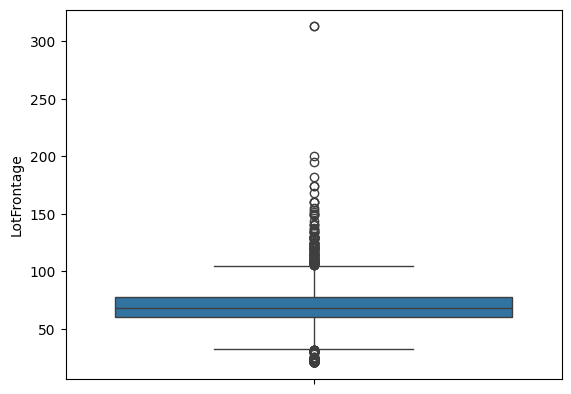

In [106]:
sns.boxplot(df.LotFrontage)

In [107]:
##200 Üzerindekierlin Tamamını 200 Upd. Etmiş oluyoruz.
df["LotFrontage"] =np.where(df["LotFrontage"] > 150, 150, df["LotFrontage"])

<Axes: ylabel='LotFrontage'>

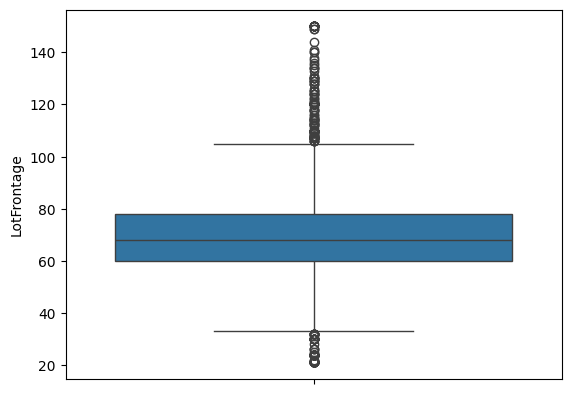

In [108]:
sns.boxplot(df.LotFrontage)

<Axes: ylabel='LotArea'>

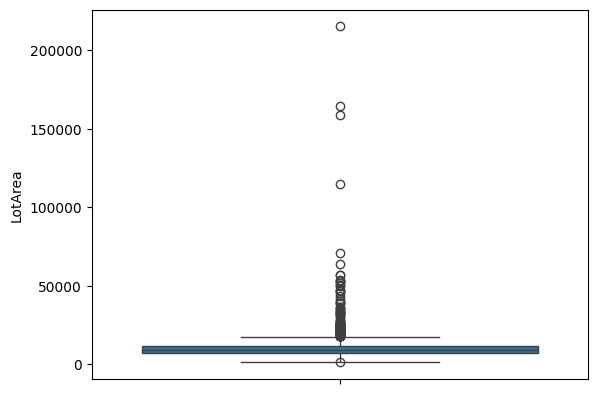

In [109]:
sns.boxplot(df.LotArea)

In [112]:
df["LotArea"] =np.where(df["LotArea"] > 60000, 60000, df["LotArea"])

<Axes: ylabel='LotArea'>

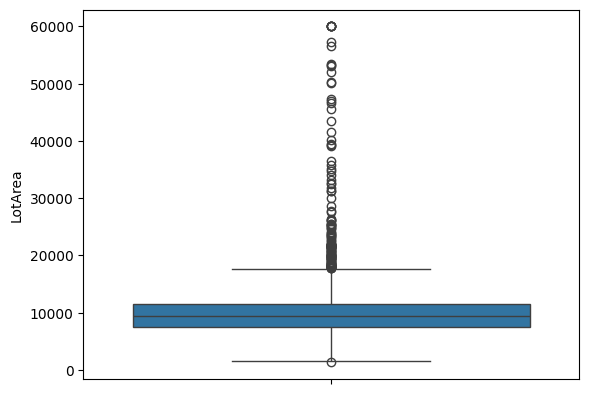

In [113]:
sns.boxplot(df.LotArea)

In [114]:
df['YearBuilt']=2024-df['YearBuilt']

<Axes: ylabel='YearBuilt'>

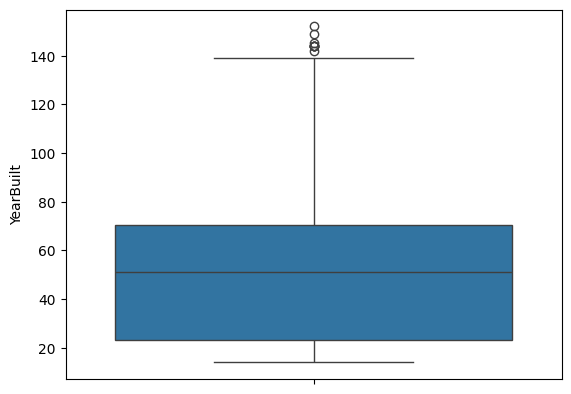

In [115]:
sns.boxplot(df.YearBuilt)

In [116]:
##140 üzerinde yaşı olanları 140 Yaslıyoruz
df["YearBuilt"] =np.where(df["YearBuilt"] > 140, 140, df["YearBuilt"])

In [117]:
df['YearRemodAdd']=2023-df['YearRemodAdd']

<Axes: ylabel='YearRemodAdd'>

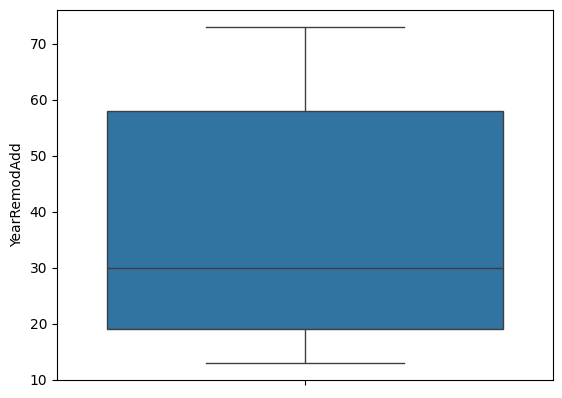

In [118]:
sns.boxplot(df.YearRemodAdd)

<Axes: ylabel='MasVnrArea'>

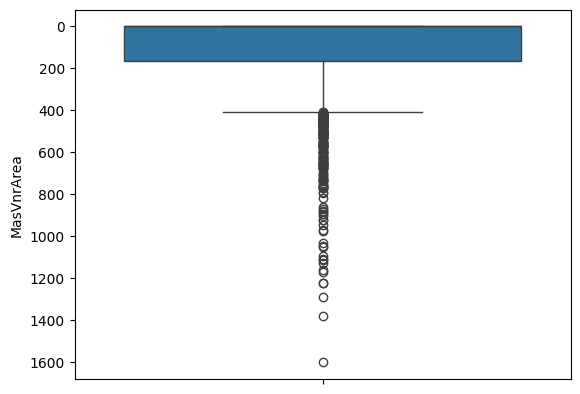

In [119]:
sns.boxplot(df.MasVnrArea)

In [123]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
##1000 üzerinde ki outlierları 400 e yasladık.
df['MasVnrArea'] =np.where(df['MasVnrArea'] > 400, 400, df['MasVnrArea'])

<Axes: ylabel='MasVnrArea'>

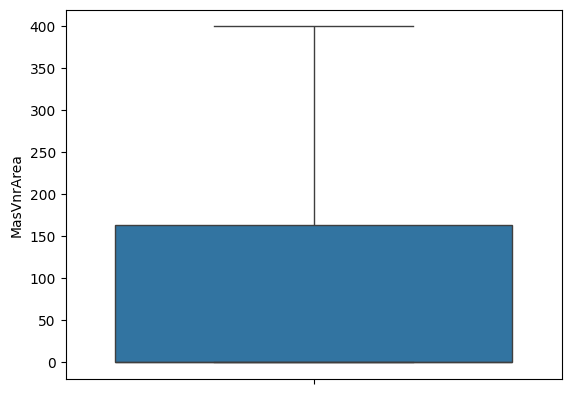

In [124]:
sns.boxplot(df.MasVnrArea)

<Axes: ylabel='BsmtFinSF1'>

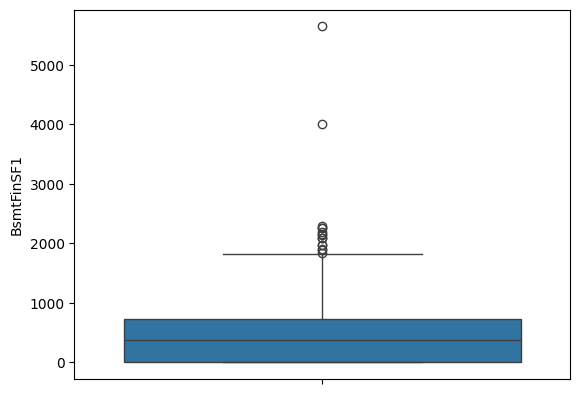

In [125]:
sns.boxplot(df.BsmtFinSF1)

In [126]:
##1700 üzerindeki düzensiz verileri MAx bir  değere sabitliyoruz.
df["BsmtFinSF1"] =np.where(df["BsmtFinSF1"] > 1700, 1700, df["BsmtFinSF1"])

<Axes: ylabel='BsmtFinSF2'>

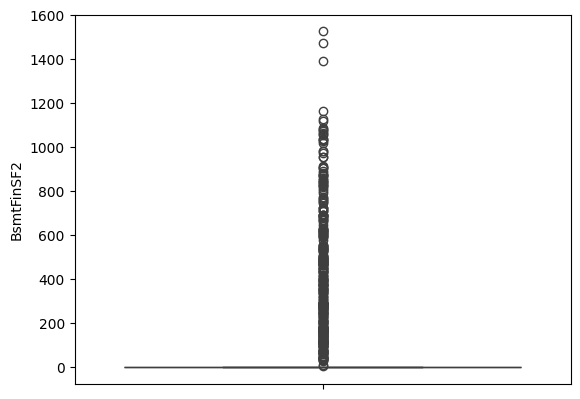

In [127]:
sns.boxplot(df.BsmtFinSF2)



In [128]:
df["BsmtFinSF2"] =np.where(df["BsmtFinSF2"] > 1000, 1000, df["BsmtFinSF2"])

In [129]:
df["BsmtUnfSF"] =np.where(df["BsmtUnfSF"] > 1600, 1600, df["BsmtUnfSF"])

In [130]:
df["TotalBsmtSF"] =np.where(df["TotalBsmtSF"] > 2000, 2000, df["TotalBsmtSF"])

Data Type integer
1stFlrSF Mode List....................................: 0    864
Name: 1stFlrSF, dtype: int64
1stFlrSF NullCount List...............................: 0


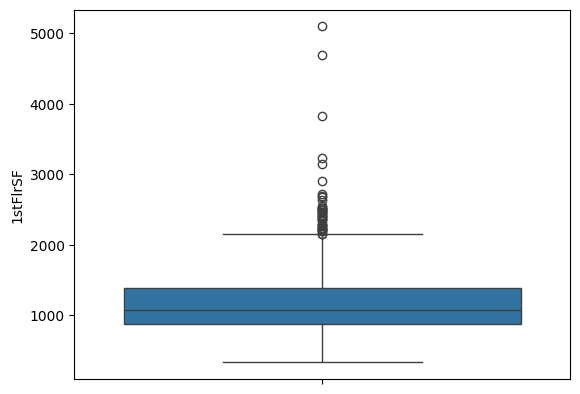

In [131]:
fnc_Column_Analysis('1stFlrSF')

In [132]:
df["1stFlrSF"] =np.where(df["1stFlrSF"] > 2000, 2000, df["1stFlrSF"])

Data Type integer
2ndFlrSF Mode List....................................: 0    0
Name: 2ndFlrSF, dtype: int64
2ndFlrSF NullCount List...............................: 0


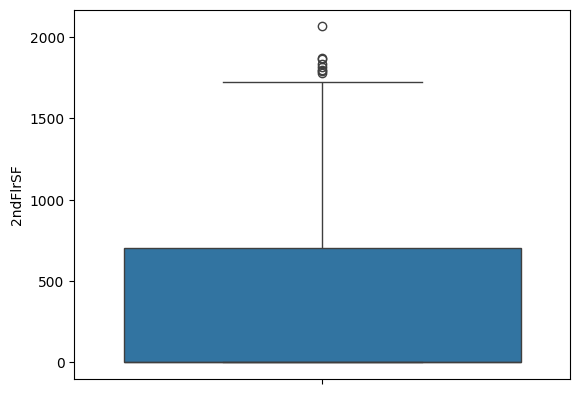

In [133]:
fnc_Column_Analysis('2ndFlrSF')

In [134]:
df["2ndFlrSF"] =np.where(df["2ndFlrSF"] > 1650, 1650, df["2ndFlrSF"])

In [135]:
df["LowQualFinSF"] =np.where(df["LowQualFinSF"] > 650, 650, df["LowQualFinSF"])

Data Type integer
GrLivArea Mode List....................................: 0    864
Name: GrLivArea, dtype: int64
GrLivArea NullCount List...............................: 0


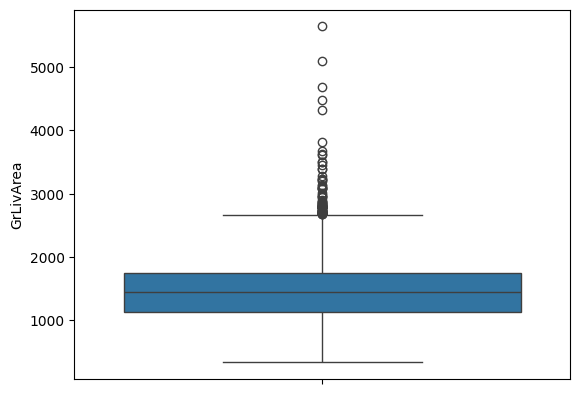

In [136]:
fnc_Column_Analysis('GrLivArea')

In [137]:
df["GrLivArea"] =np.where(df["GrLivArea"] > 3500, 3500, df["GrLivArea"])

Data Type integer
BsmtFullBath Mode List....................................: 0    0.0
Name: BsmtFullBath, dtype: float64
BsmtFullBath NullCount List...............................: 0


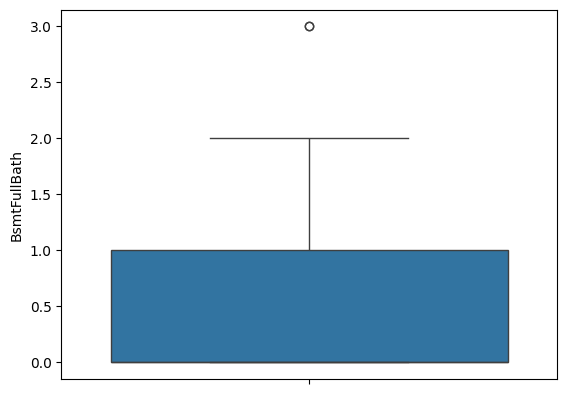

In [138]:
fnc_Column_Analysis('BsmtFullBath')

In [139]:
df["BsmtFullBath"] =np.where(df["BsmtFullBath"] > 2, 2, df["BsmtFullBath"])

Data Type integer
FullBath Mode List....................................: 0    2
Name: FullBath, dtype: int64
FullBath NullCount List...............................: 0


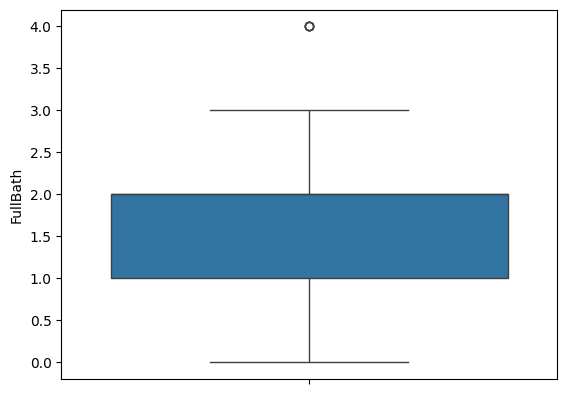

In [140]:
fnc_Column_Analysis('FullBath')

In [141]:
df["FullBath"] =np.where(df["FullBath"] > 3, 3, df["FullBath"])

Data Type integer
BedroomAbvGr Mode List....................................: 0    3
Name: BedroomAbvGr, dtype: int64
BedroomAbvGr NullCount List...............................: 0


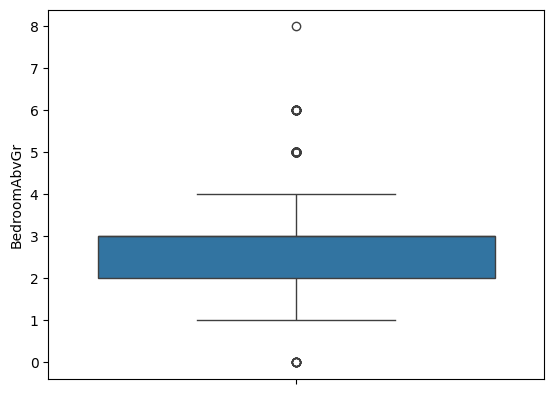

In [142]:
fnc_Column_Analysis('BedroomAbvGr')

In [143]:
df["BedroomAbvGr"] =np.where(df["BedroomAbvGr"] > 4, 4, df["BedroomAbvGr"])
df["BedroomAbvGr"] =np.where(df["BedroomAbvGr"] < 1, 1, df["BedroomAbvGr"])

<Axes: ylabel='BedroomAbvGr'>

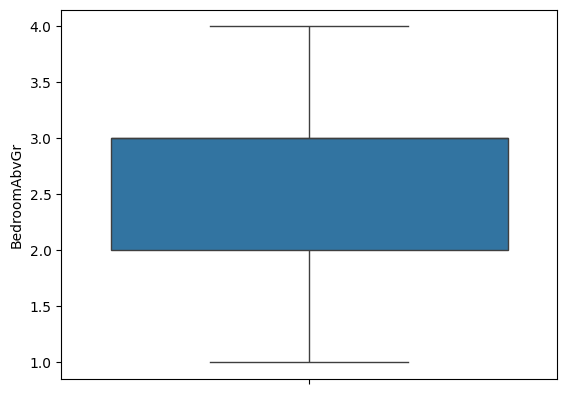

In [144]:
sns.boxplot(df.BedroomAbvGr)

Data Type integer
TotRmsAbvGrd Mode List....................................: 0    6
Name: TotRmsAbvGrd, dtype: int64
TotRmsAbvGrd NullCount List...............................: 0


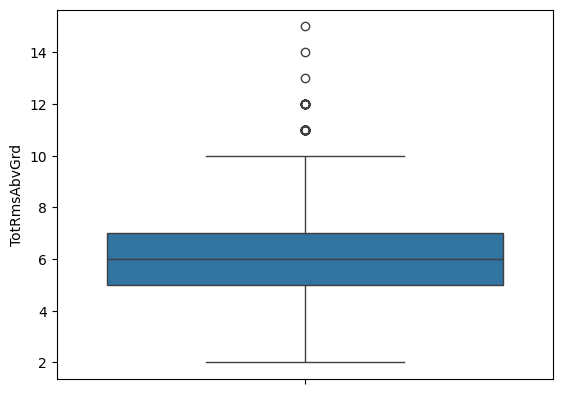

In [145]:
fnc_Column_Analysis('TotRmsAbvGrd')

In [146]:
df["TotRmsAbvGrd"] =np.where(df["TotRmsAbvGrd"] > 10, 10, df["TotRmsAbvGrd"])

Data Type integer
Fireplaces Mode List....................................: 0    0
Name: Fireplaces, dtype: int64
Fireplaces NullCount List...............................: 0


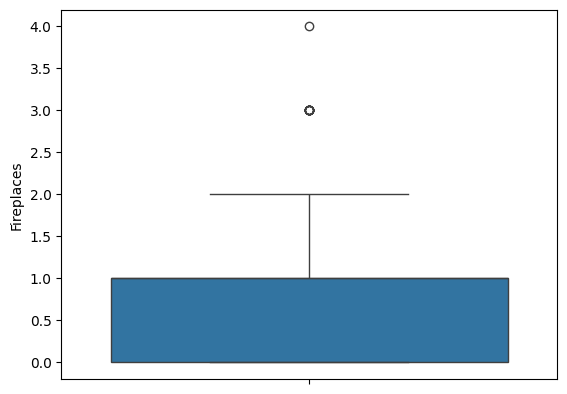

In [147]:
fnc_Column_Analysis('Fireplaces')

In [148]:
df["Fireplaces"] =np.where(df["Fireplaces"] > 2, 2, df["Fireplaces"])

Data Type integer
GarageYrBlt Mode List....................................: 0    1979.0
Name: GarageYrBlt, dtype: float64
GarageYrBlt NullCount List...............................: 0


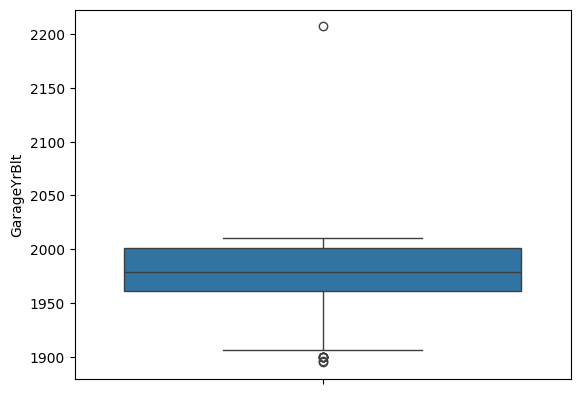

In [149]:
fnc_Column_Analysis('GarageYrBlt')

In [150]:
df["GarageYrBlt"] =np.where(df["GarageYrBlt"] > 2024, 2024, df["GarageYrBlt"])
df["GarageYrBlt"] =np.where(df["GarageYrBlt"] < 1900, 1900, df["GarageYrBlt"])

<Axes: ylabel='GarageYrBlt'>

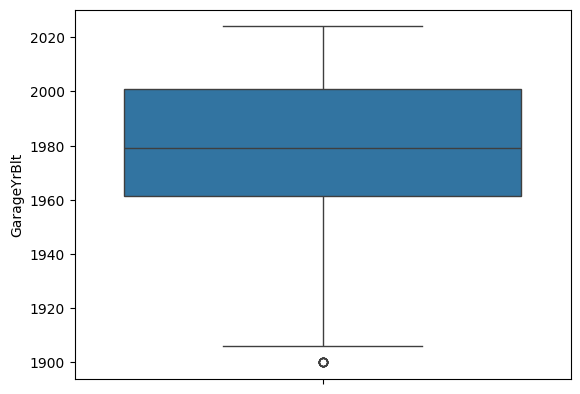

In [151]:
sns.boxplot(df.GarageYrBlt)

In [152]:
df["GarageYrBlt"]=2024-df["GarageYrBlt"]

Data Type integer
GarageCars Mode List....................................: 0    2.0
Name: GarageCars, dtype: float64
GarageCars NullCount List...............................: 0


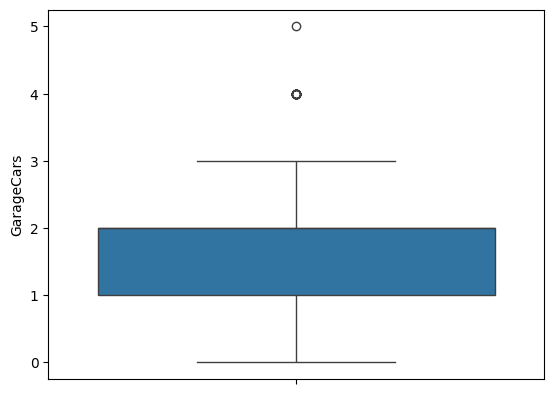

In [153]:
fnc_Column_Analysis('GarageCars')

In [154]:
df["GarageCars"] =np.where(df["GarageCars"] > 3, 3, df["GarageCars"])

Data Type integer
GarageArea Mode List....................................: 0    0.0
Name: GarageArea, dtype: float64
GarageArea NullCount List...............................: 0


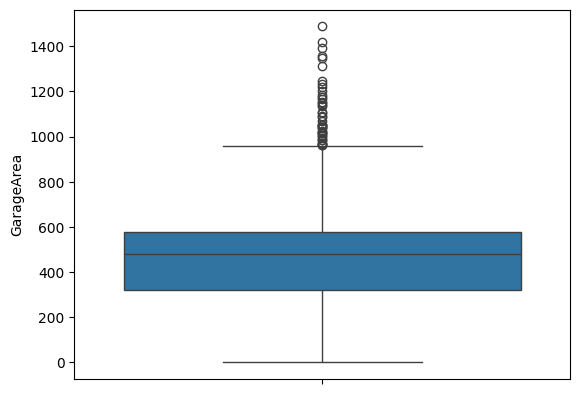

In [155]:
fnc_Column_Analysis('GarageArea')

In [156]:
df["GarageArea"] =np.where(df["GarageArea"] > 1200, 1200, df["GarageArea"])

In [157]:
df["WoodDeckSF"] =np.where(df["WoodDeckSF"] > 700, 700, df["WoodDeckSF"])

In [158]:
df["OpenPorchSF"] =np.where(df["OpenPorchSF"] > 350, 350, df["OpenPorchSF"])

Data Type integer
EnclosedPorch Mode List....................................: 0    0
Name: EnclosedPorch, dtype: int64
EnclosedPorch NullCount List...............................: 0


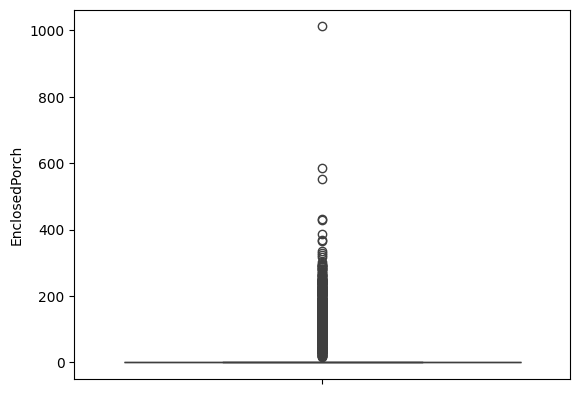

In [159]:
fnc_Column_Analysis('EnclosedPorch')

In [160]:
df["EnclosedPorch"] =np.where(df["EnclosedPorch"] > 400, 400, df["EnclosedPorch"])

In [161]:
x=df[1459:].drop("SalePrice",axis=1)
y=df[1459:][['SalePrice']]

In [162]:
x=pd.get_dummies(x,drop_first=True)

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [164]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [165]:
tahmin=RFR.predict(x_test)

In [166]:
r2_score(y_test,tahmin)

0.8925453260646391

In [167]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [168]:
tahmin=GBR.predict(x_test)

In [169]:
r2_score(y_test,tahmin)

0.9057885323621879

In [170]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.906933,26718.100068,17020.244304
XGBRegressor,0.885173,29677.614228,18820.073657
Ridge,0.875087,30953.517332,19162.336239
ElasticNet,0.826467,36483.592787,20380.208566
Lasso,0.787518,40370.881506,19789.257366
Decision Tree,0.781486,40939.856226,26698.167808
Linear,0.775350,41510.744325,20029.433731
Extra Tree,0.759362,42962.467324,27370.287671
KNeighborsRegressor,0.697002,48208.870323,29357.404795
